In [2]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import mplhep as hep

In [3]:
rdf = ROOT.RDataFrame( "T" , "data/snapshot_Nov_2020.root" )
df = rdf.AsNumpy()
Date = "November 2020"
this_year = 2020 

In [4]:
options = widgets.Dropdown( options = sorted( df.keys() ), value = "Npresentations3y" )
options

Dropdown(index=5, options=('Author', 'Country', 'Gender', 'Joined', 'Newmember_malus', 'Npresentations3y', 'Po…

In [5]:
member_list = {
    i: {
        "Author": df["Author"][i],
        "Years": this_year- int( df["Joined"][i] ),
        "Gender": df["Gender"][i],
        "Country": df["Country"][i],
        "Position": df["Position"][i],
        "Presentations_3y": df["Npresentations3y"][i],
        "Presentations_all": df["nParallelGiven"][i] + df["nPlenaryGiven"][i] + df["nInvitedGiven"][i]
    } for i in range( len( df["Author"] ) )
}

In [6]:
author_status = widgets.SelectMultiple( options = [ 1, 0 ] )
author_status

SelectMultiple(options=(1, 0), value=())

In [7]:
country_status = widgets.SelectMultiple( options = list( set( df["Country"] ) ) )
country_status

SelectMultiple(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50), value=())

In [8]:
hists = {
    "Male": {
        "Years": [], "Presentations_3y": [], "Presentations_all": []
    },
    "Female": {
        "Years": [], "Presentations_3y": [], "Presentations_all": []
    }
}

for i in member_list:
    member = member_list[i]
    if member["Country"] in country_status.value and member["Author"] in author_status.value:
        if member["Gender"] == 0:
            hists["Male"]["Presentations_3y"].append( member["Presentations_3y"] )
            hists["Male"]["Presentations_all"].append( member["Presentations_all"] )
            hists["Male"]["Years"].append( member["Years"] )
        if member["Gender"] == 1:
            hists["Female"]["Presentations_3y"].append( member["Presentations_3y"] )
            hists["Female"]["Presentations_all"].append( member["Presentations_all"] )
            hists["Female"]["Years"].append( member["Years"] )

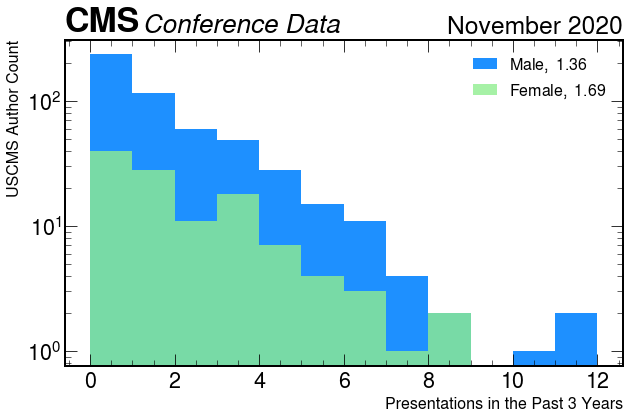

In [9]:
bins = np.linspace(0,max(df["Npresentations3y"]),max(df["Npresentations3y"]+1))
fontsize = 16
plt.style.use(hep.style.CMS)
plt.figure( figsize = (10,6) )
hep.cms.text("Conference Data")
hep.cms.lumitext( Date )

hist_M = plt.hist(
    hists["Male"]["Presentations_3y"], bins = bins,
    label = r"$Male,\ {:.2f}$".format(
        np.mean(hists["Male"]["Presentations_3y"])
    ),
    color = "dodgerblue"
)
hist_F = plt.hist(
    hists["Female"]["Presentations_3y"], bins = bins,
    label = r"$Female,\ {:.2f}$".format(
        np.mean(hists["Female"]["Presentations_3y"])
    ),
    color = "lightgreen", alpha = 0.8
)
if list( author_status.value ) == [1]: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS Author Count", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS Author Count", fontsize = fontsize )
    else:
        plt.ylabel( "Author Count", fontsize = fontsize )
else: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS All Members Count", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS All Members Count", fontsize = fontsize )
    else:
        plt.ylabel( "All Members Count", fontsize = fontsize )
plt.xlabel( "Presentations in the Past 3 Years", fontsize = fontsize )
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

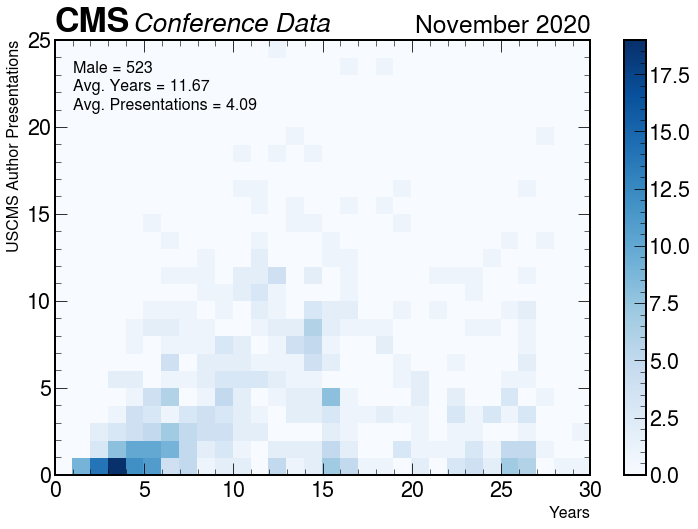

In [10]:
total_talks = df["nParallelGiven"] + df["nPlenaryGiven"] + df["nInvitedGiven"]
bins_x = np.linspace(0,2020-min(df["Joined"]),2020-min(df["Joined"])+1)
bins_y = np.linspace(0,max(total_talks),max(total_talks)+1)
fontsize = 16
plt.style.use(hep.style.CMS)
plt.figure( figsize = (12,8) )
hep.cms.text("Conference Data")
hep.cms.lumitext( Date )

hist2d_M = plt.hist2d(
    hists["Male"]["Years"], hists["Male"]["Presentations_all"],
    bins = [bins_x, bins_y], cmap = plt.cm.Blues
)

cbar = plt.colorbar()

plt.text( 
    1, 21,
    "Male = {}\nAvg. Years = {:.2f}\nAvg. Presentations = {:.2f}".format(
        len(hists["Male"]["Years"]),
        np.mean(hists["Male"]["Years"]),
        np.mean(hists["Male"]["Presentations_all"])
    ),
    fontsize = 16
)
plt.xlabel( "Years", fontsize = fontsize )
if list( author_status.value ) == [1]: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS Author Presentations", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS Author Presentations", fontsize = fontsize )
    else:
        plt.ylabel( "Author Presentations", fontsize = fontsize )
else: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS All Members Presentations", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS All Members Presentations", fontsize = fontsize )
    else:
        plt.ylabel( "All Members Presentations", fontsize = fontsize )

plt.ylim(0,25)
plt.show()

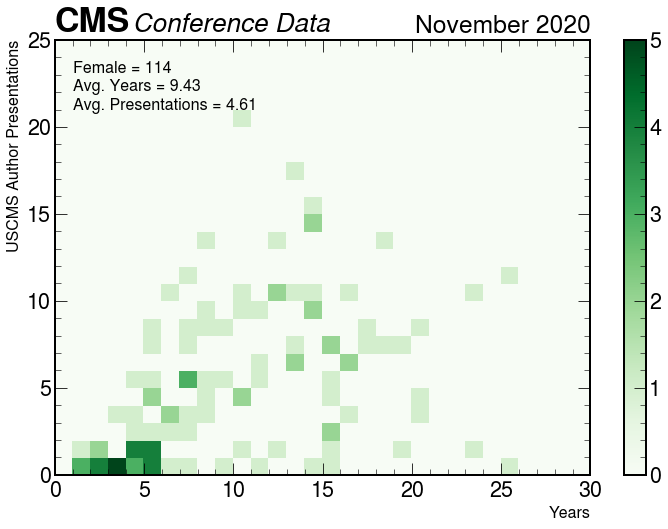

In [11]:
total_talks = df["nParallelGiven"] + df["nPlenaryGiven"] + df["nInvitedGiven"]
bins_x = np.linspace(0,2020-min(df["Joined"]),2020-min(df["Joined"])+1)
bins_y = np.linspace(0,max(total_talks),max(total_talks)+1)
fontsize = 16
plt.style.use(hep.style.CMS)
plt.figure( figsize = (12,8) )
hep.cms.text("Conference Data")
hep.cms.lumitext( Date )

hist2d_M = plt.hist2d(
    hists["Female"]["Years"], hists["Female"]["Presentations_all"],
    bins = [bins_x, bins_y], cmap = plt.cm.Greens
)

cbar = plt.colorbar()

plt.text( 
    1, 21,
    "Female = {}\nAvg. Years = {:.2f}\nAvg. Presentations = {:.2f}".format(
        len(hists["Female"]["Years"]),
        np.mean(hists["Female"]["Years"]),
        np.mean(hists["Female"]["Presentations_all"])
    ),
    fontsize = 16
)
plt.xlabel( "Years", fontsize = fontsize )
if list( author_status.value ) == [1]: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS Author Presentations", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS Author Presentations", fontsize = fontsize )
    else:
        plt.ylabel( "Author Presentations", fontsize = fontsize )
else: 
    if len( country_status.value ) == len( set( df["Country"] ) ):
        plt.ylabel( "CMS All Members Presentations", fontsize = fontsize )
    elif list(country_status.value) == [1]:
        plt.ylabel( "USCMS All Members Presentations", fontsize = fontsize )
    else:
        plt.ylabel( "All Members Presentations", fontsize = fontsize )

plt.ylim(0,25)
plt.show()